<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.123578,54.829044,74.273898,-0.000018,201.226502,201.226369,0.000134
1,0.0,1.0,71.486505,79.152946,92.438142,0.000214,253.077806,253.077718,0.000088
2,0.0,2.0,20.070516,26.649802,92.764476,-0.001470,149.483324,149.484267,-0.000943
3,0.0,3.0,73.796299,87.256738,85.529417,-0.000143,256.582311,256.582652,-0.000341
4,0.0,4.0,62.358430,56.624725,64.213060,-0.000470,193.195744,193.196067,-0.000322
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.064880,36.957519,33.978675,0.000616,146.001689,146.001065,0.000624
29996,999.0,26.0,97.630159,92.869136,46.675263,-0.000099,247.174459,247.174656,-0.000197
29997,999.0,27.0,94.001023,82.372889,58.508710,0.000041,244.882663,244.882724,-0.000061
29998,999.0,28.0,42.284699,99.054924,51.497629,-0.000167,202.837085,202.837160,-0.000074


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.123578,54.829044,74.273898,-0.000018,201.226502,201.226369,0.000134
1,0.0,1.0,71.486505,79.152946,92.438142,0.000214,253.077806,253.077718,0.000088
2,0.0,2.0,20.070516,26.649802,92.764476,-0.001470,149.483324,149.484267,-0.000943
3,0.0,3.0,73.796299,87.256738,85.529417,-0.000143,256.582311,256.582652,-0.000341
4,0.0,4.0,62.358430,56.624725,64.213060,-0.000470,193.195744,193.196067,-0.000322
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.064880,36.957519,33.978675,0.000616,146.001689,146.001065,0.000624
29996,999.0,26.0,97.630159,92.869136,46.675263,-0.000099,247.174459,247.174656,-0.000197
29997,999.0,27.0,94.001023,82.372889,58.508710,0.000041,244.882663,244.882724,-0.000061
29998,999.0,28.0,42.284699,99.054924,51.497629,-0.000167,202.837085,202.837160,-0.000074


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.123578,54.829044,74.273898,-0.000018,201.226502,201.226369,0.000134
1,0.0,1.0,71.486505,79.152946,92.438142,0.000214,253.077806,253.077718,0.000088
2,0.0,2.0,20.070516,26.649802,92.764476,-0.001470,149.483324,149.484267,-0.000943
3,0.0,3.0,73.796299,87.256738,85.529417,-0.000143,256.582311,256.582652,-0.000341
4,0.0,4.0,62.358430,56.624725,64.213060,-0.000470,193.195744,193.196067,-0.000322
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.064880,36.957519,33.978675,0.000616,146.001689,146.001065,0.000624
29996,999.0,26.0,97.630159,92.869136,46.675263,-0.000099,247.174459,247.174656,-0.000197
29997,999.0,27.0,94.001023,82.372889,58.508710,0.000041,244.882663,244.882724,-0.000061
29998,999.0,28.0,42.284699,99.054924,51.497629,-0.000167,202.837085,202.837160,-0.000074


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.123578  54.829044  74.273898  ...  201.226502  201.226369  0.000134
      1.0    71.486505  79.152946  92.438142  ...  253.077806  253.077718  0.000088
      2.0    20.070516  26.649802  92.764476  ...  149.483324  149.484267 -0.000943
      3.0    73.796299  87.256738  85.529417  ...  256.582311  256.582652 -0.000341
      4.0    62.358430  56.624725  64.213060  ...  193.195744  193.196067 -0.000322
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   65.064880  36.957519  33.978675  ...  146.001689  146.001065  0.000624
      26.0   97.630159  92.869136  46.675263  ...  247.174459  247.174656 -0.000197
      27.0   94.001023  82.372889  58.508710  ...  244.882663  244.882724 -0.000061
      28.0   42.284699  99.054924  51.497629  ...  202.837085  202.837160 -0.000074
      29.0   36.849566  94.237601  85.986361  ...  227.073474  227.073457  0.000017

[30000 rows x 7 columns]

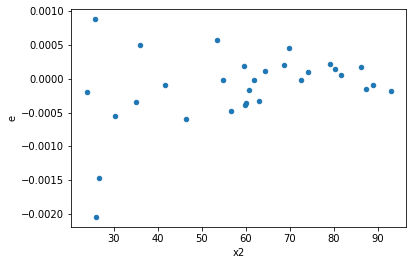

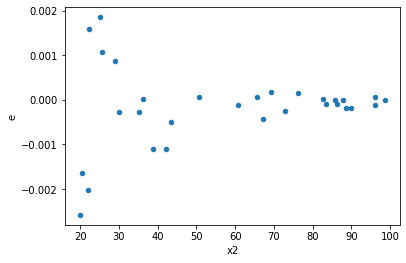

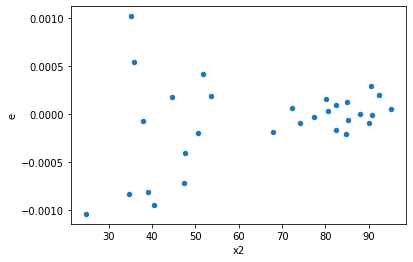

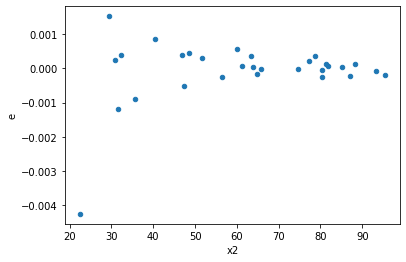

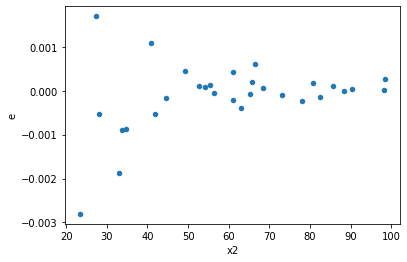

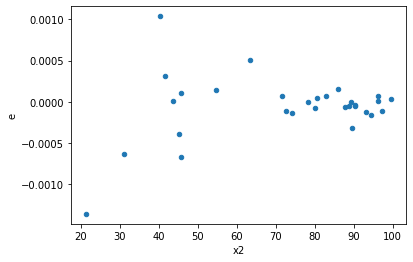

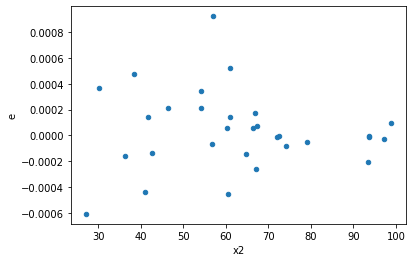

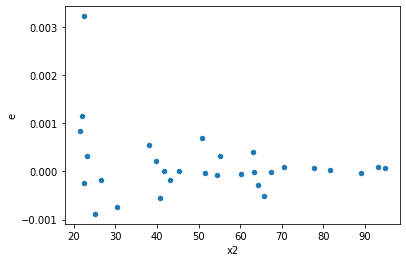

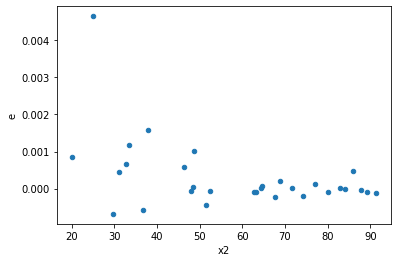

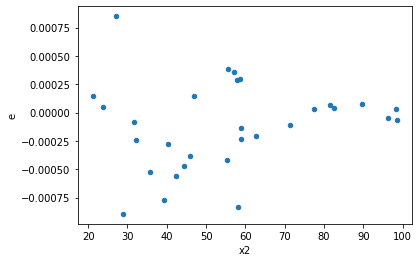

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2.0663890073538303e-07,6.24866362483818e-06,2.582986259192288e-08,7.810829531047725e-07,0.03306929499517336,2.267697751829472e-05,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,1.3766266756856268e-07,2.0168340754119332e-05,1.7207833446070335e-08,2.5210425942649166e-06,0.0068256813610433195,2.2592252354130247e-08,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,1.673458096077901e-07,2.7927093038150417e-06,2.0918226200973762e-08,3.490886629768802e-07,0.05992238768968316,0.0002726670426325616,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,3.053822907364754e-07,1.965678182690163e-05,3.8172786342059424e-08,2.4570977283627037e-06,0.015535721636719759,8.585731390847301e-07,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,3.3403105168192143e-07,1.0973349416435893e-05,4.175388146024018e-08,1.3716686770544866e-06,0.030440209183679994,1.591515830388519e-05,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,9.765220976822638e-08,2.700783840603303e-06,1.2206526221028297e-08,3.3759798007541286e-07,0.03615698831581159,3.31532713813832e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,1.2112017379955885e-07,1.0748596884680545e-06,1.5140021724944856e-08,1.343574610585068e-07,0.11268463698009326,0.0032796437983618892,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,4.991749106133548e-07,8.276893146068227e-06,6.239686382666935e-08,1.0346116432585284e-06,0.06030945450231865,0.00027993370712438173,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,3.316526140015137e-07,1.2744039861821833e-05,4.145657675018921e-08,1.593004982727729e-06,0.026024135015072218,8.113099376433584e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    964
Reject001=1 : Homoscedasticity       36
Name: Result_test, dtype: int64